In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
base_we = pd.read_csv('Sources/lv40_interpolated_profiles_11Feb2012_new.csv')
base_wd = pd.read_csv('Sources/lv40_interpolated_profiles_12Dec2012_new.csv')
ev_we = pd.read_csv('Sources/EV_profiles_weekend.csv')
ev_wd = pd.read_csv('Sources/EV_profiles_weekday.csv')
hp_poor = pd.read_csv('Sources/HP_load_poor.csv')
hp_average = pd.read_csv('Sources/HP_load_average.csv')
hp_good = pd.read_csv('Sources/HP_load_good.csv')
pv = pd.read_csv('Sources/pv_battery_1min_11jan2025.csv')

# Profiles cleaning and preparation

## Base week end profiles preparing

In [7]:
base_we.head()

,datetime,MAC000028,MAC000041,MAC000058,MAC000089,MAC000095,MAC000126,MAC000143,MAC000144,MAC000148,...,MAC005024,MAC005025,MAC005193,MAC005227,MAC005229,MAC005257,MAC005261,MAC005268,MAC005270,MAC005273
0,2012-02-11 00:00:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
1,2012-02-11 00:01:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
2,2012-02-11 00:02:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
3,2012-02-11 00:03:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
4,2012-02-11 00:04:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354


In [8]:
# Ensure datetime column is in datetime format
base_we['datetime'] = pd.to_datetime(base_we['datetime'])

# Create new columns
base_we['date'] = base_we['datetime'].dt.date
base_we['time'] = base_we['datetime'].dt.time

# Moving the new columns to the front
cols = ['date', 'time'] + [col for col in base_we.columns if col not in ['date', 'time']]
base_we = base_we[cols]

base_we.head()


,date,time,datetime,MAC000028,MAC000041,MAC000058,MAC000089,MAC000095,MAC000126,MAC000143,...,MAC005024,MAC005025,MAC005193,MAC005227,MAC005229,MAC005257,MAC005261,MAC005268,MAC005270,MAC005273
0,2012-02-11,00:00:00,2012-02-11 00:00:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
1,2012-02-11,00:01:00,2012-02-11 00:01:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
2,2012-02-11,00:02:00,2012-02-11 00:02:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
3,2012-02-11,00:03:00,2012-02-11 00:03:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
4,2012-02-11,00:04:00,2012-02-11 00:04:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354


In [9]:
# Drop unwanted columns and create a new DataFrame
base_we_time = base_we.drop(columns=['datetime', 'date'])

base_we_time.head()


,time,MAC000028,MAC000041,MAC000058,MAC000089,MAC000095,MAC000126,MAC000143,MAC000144,MAC000148,...,MAC005024,MAC005025,MAC005193,MAC005227,MAC005229,MAC005257,MAC005261,MAC005268,MAC005270,MAC005273
0,00:00:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
1,00:01:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
2,00:02:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
3,00:03:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
4,00:04:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354


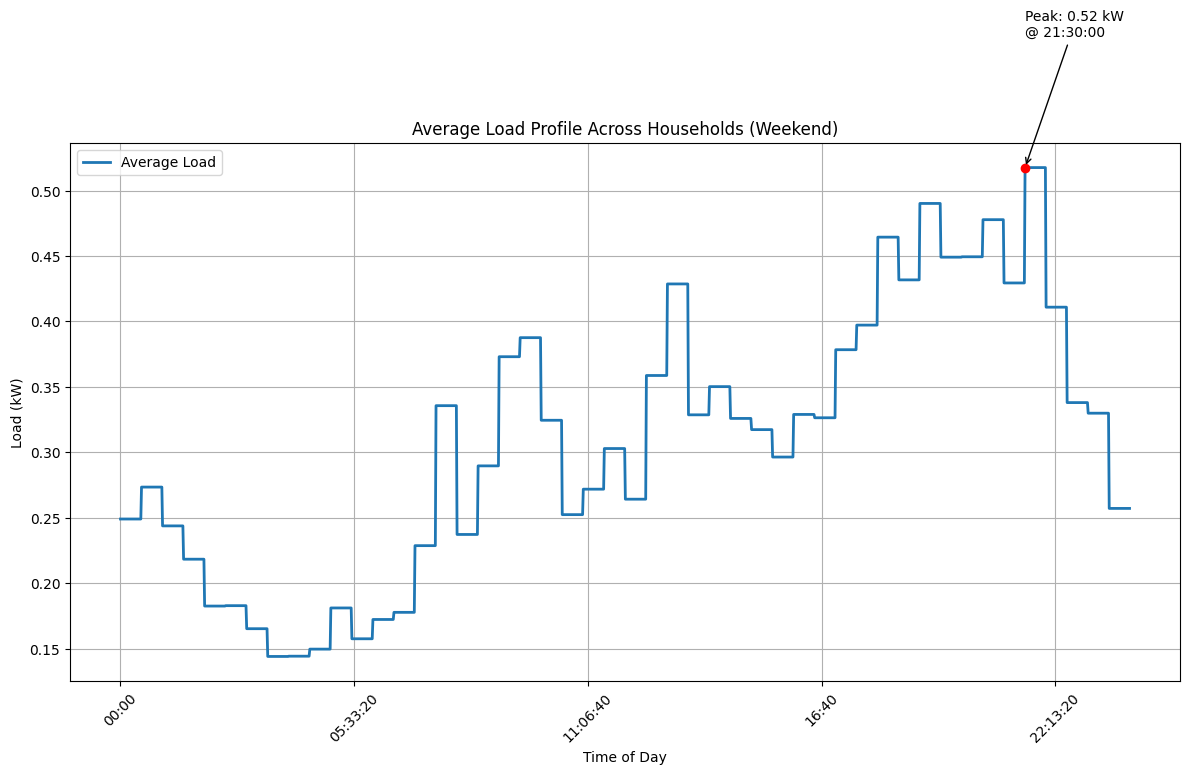

In [10]:
import matplotlib.pyplot as plt

# Step 1: Ensure 'time' is in proper format and set as index
base_we_time['time'] = pd.to_datetime(base_we_time['time'], format='%H:%M:%S').dt.time
base_we_time.set_index('time', inplace=True)

# Step 2: Select numeric household columns
numeric_cols = base_we_time.select_dtypes(include='number')

# Step 3: Compute average load
base_we_time['avg_load'] = numeric_cols.mean(axis=1)

# Step 4: Find peak time and value
peak_time = base_we_time['avg_load'].idxmax()
peak_value = base_we_time['avg_load'].max()

# Step 5: Plot with peak annotation
plt.figure(figsize=(12, 8))
base_we_time['avg_load'].plot(label='Average Load', linewidth=2)

# Add red marker at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot

# Annotate the peak
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title('Average Load Profile Across Households (Weekend)')
plt.xlabel('Time of Day')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [129]:
# Drop 'avg_load' column
base_we_time = base_we_time.drop(columns=['avg_load'])

base_we_time.head()

,MAC000028,MAC000041,MAC000058,MAC000089,MAC000095,MAC000126,MAC000143,MAC000144,MAC000148,MAC000172,...,MAC005024,MAC005025,MAC005193,MAC005227,MAC005229,MAC005257,MAC005261,MAC005268,MAC005270,MAC005273
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,0.044,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
00:01:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,0.044,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
00:02:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,0.044,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
00:03:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,0.044,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354
00:04:00,0.15,0.124,0.15,0.116,0.108,0.246,0.176,0.07,0.276,0.044,...,0.112,0.42,0.264,0.132,0.066,0.174,0.256,0.838,0.238,0.354


## Base week day profiles preparing

In [130]:
base_wd.head()

,date,time,datetime,MAC000055,MAC000203,MAC000214,MAC000239,MAC000250,MAC000676,MAC000727,...,MAC003718,MAC004146,MAC004508,MAC004619,MAC004848,MAC004856,MAC004933,MAC005219,MAC005325,MAC005531
0,2012-12-12,00:00:00,2012-12-12 00:00:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
1,2012-12-12,00:01:00,2012-12-12 00:01:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
2,2012-12-12,00:02:00,2012-12-12 00:02:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
3,2012-12-12,00:03:00,2012-12-12 00:03:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
4,2012-12-12,00:04:00,2012-12-12 00:04:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238


In [131]:
# Ensure datetime column is in datetime format
base_wd['datetime'] = pd.to_datetime(base_wd['datetime'])

# Create new columns
base_wd['date'] = base_wd['datetime'].dt.date
base_wd['time'] = base_wd['datetime'].dt.time

# Moving the new columns to the front
cols = ['date', 'time'] + [col for col in base_wd.columns if col not in ['date', 'time']]
base_wd = base_wd[cols]

base_wd.head()

,date,time,datetime,MAC000055,MAC000203,MAC000214,MAC000239,MAC000250,MAC000676,MAC000727,...,MAC003718,MAC004146,MAC004508,MAC004619,MAC004848,MAC004856,MAC004933,MAC005219,MAC005325,MAC005531
0,2012-12-12,00:00:00,2012-12-12 00:00:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
1,2012-12-12,00:01:00,2012-12-12 00:01:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
2,2012-12-12,00:02:00,2012-12-12 00:02:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
3,2012-12-12,00:03:00,2012-12-12 00:03:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
4,2012-12-12,00:04:00,2012-12-12 00:04:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238


In [132]:
# Drop unwanted columns and create a new DataFrame
base_wd_time = base_wd.drop(columns=['datetime', 'date'])

base_wd_time.tail()

,time,MAC000055,MAC000203,MAC000214,MAC000239,MAC000250,MAC000676,MAC000727,MAC000734,MAC000761,...,MAC003718,MAC004146,MAC004508,MAC004619,MAC004848,MAC004856,MAC004933,MAC005219,MAC005325,MAC005531
1435,23:55:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
1436,23:56:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
1437,23:57:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
1438,23:58:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
1439,23:59:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122


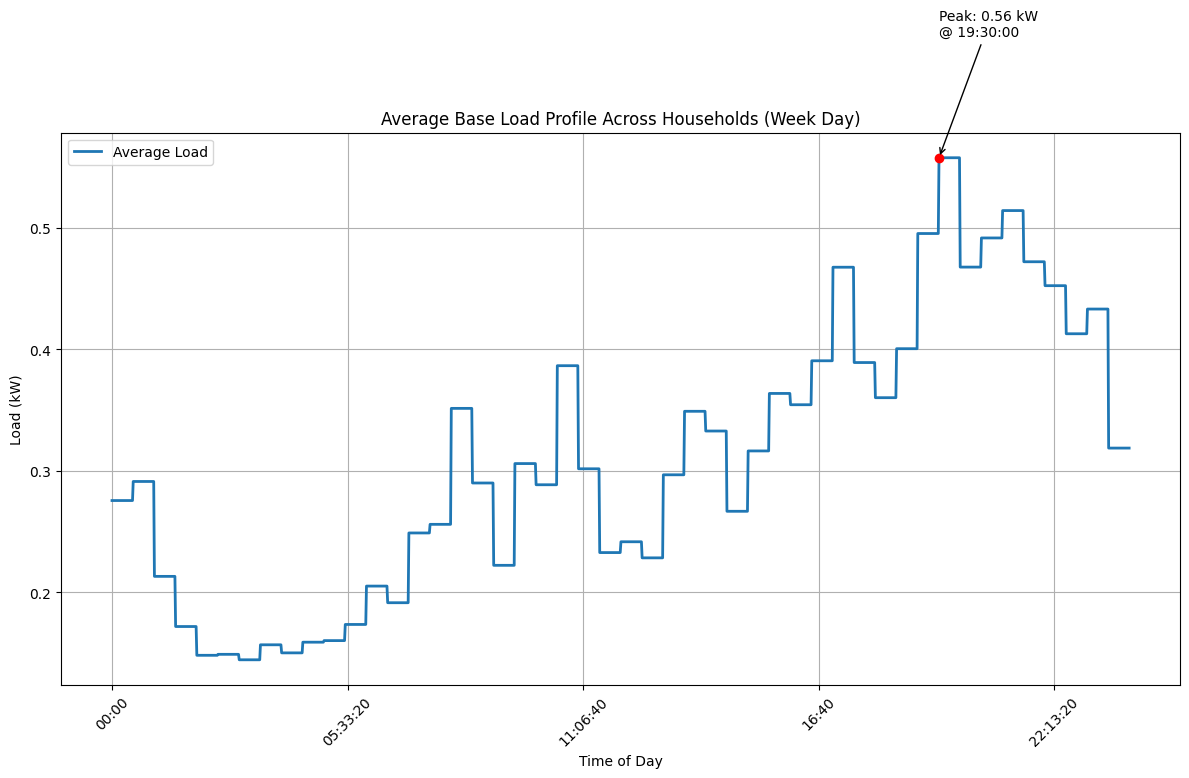

In [133]:
import matplotlib.pyplot as plt

# Step 1: Ensure 'time' is in proper format and set as index
base_wd_time['time'] = pd.to_datetime(base_wd_time['time'], format='%H:%M:%S').dt.time
base_wd_time.set_index('time', inplace=True)

# Step 2: Select numeric household columns
numeric_cols = base_wd_time.select_dtypes(include='number')

# Step 3: Compute average load
base_wd_time['avg_load'] = numeric_cols.mean(axis=1)

# Step 4: Find peak time and value
peak_time = base_wd_time['avg_load'].idxmax()
peak_value = base_wd_time['avg_load'].max()

# Step 5: Plot with peak annotation
plt.figure(figsize=(12, 8))
base_wd_time['avg_load'].plot(label='Average Load', linewidth=2)

# Add red marker at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot

# Annotate the peak
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title('Average Base Load Profile Across Households (Week Day)')
plt.xlabel('Time of Day')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [134]:
# Drop 'avg_load' column
base_wd_time = base_wd_time.drop(columns=['avg_load'])

base_wd_time.tail()

,MAC000055,MAC000203,MAC000214,MAC000239,MAC000250,MAC000676,MAC000727,MAC000734,MAC000761,MAC000792,...,MAC003718,MAC004146,MAC004508,MAC004619,MAC004848,MAC004856,MAC004933,MAC005219,MAC005325,MAC005531
time,,,,,,,,,,,,,,,,,,,,,
23:55:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,0.312,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
23:56:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,0.312,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
23:57:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,0.312,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
23:58:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,0.312,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
23:59:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,0.312,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122


# EV profiles preparing

## Weekday

In [135]:
ev_wd.head()

,date,time,timestamp,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6,EV_7,EV_8,EV_9,EV_10
0,2025-09-11,00:00:00,2025-09-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-09-11,00:01:00,2025-09-11 00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-09-11,00:02:00,2025-09-11 00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-09-11,00:03:00,2025-09-11 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-09-11,00:04:00,2025-09-11 00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
ev_wd.tail()

,date,time,timestamp,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6,EV_7,EV_8,EV_9,EV_10
1435,2025-09-11,23:55:00,2025-09-11 23:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.331184,0.0
1436,2025-09-11,23:56:00,2025-09-11 23:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.311961,0.0
1437,2025-09-11,23:57:00,2025-09-11 23:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.292738,0.0
1438,2025-09-11,23:58:00,2025-09-11 23:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.273515,0.0
1439,2025-09-11,23:59:00,2025-09-11 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.254291,0.0


In [137]:
# Ensure datetime column is in datetime format
ev_wd['timestamp'] = pd.to_datetime(ev_wd['timestamp'])

# Create new columns
ev_wd['date'] = ev_wd['timestamp'].dt.date
ev_wd['time'] = ev_wd['timestamp'].dt.time

# Moving the new columns to the front
cols = ['date', 'time'] + [col for col in ev_wd.columns if col not in ['date', 'time']]
ev_wd = ev_wd[cols]

ev_wd.head()

,date,time,timestamp,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6,EV_7,EV_8,EV_9,EV_10
0,2025-09-11,00:00:00,2025-09-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-09-11,00:01:00,2025-09-11 00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-09-11,00:02:00,2025-09-11 00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-09-11,00:03:00,2025-09-11 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-09-11,00:04:00,2025-09-11 00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
# Drop unwanted columns and create a new DataFrame
ev_wd_time = ev_wd.drop(columns=['timestamp', 'date'])

ev_wd_time.head()

,time,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6,EV_7,EV_8,EV_9,EV_10
0,00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Weekend

In [139]:
ev_we.head()

,date,time,timestamp,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6,EV_7,EV_8,EV_9,EV_10
0,2025-09-11,00:00:00,2025-09-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-09-11,00:01:00,2025-09-11 00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-09-11,00:02:00,2025-09-11 00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-09-11,00:03:00,2025-09-11 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-09-11,00:04:00,2025-09-11 00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
ev_we.tail()

,date,time,timestamp,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6,EV_7,EV_8,EV_9,EV_10
1435,2025-09-11,23:55:00,2025-09-11 23:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,2025-09-11,23:56:00,2025-09-11 23:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,2025-09-11,23:57:00,2025-09-11 23:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,2025-09-11,23:58:00,2025-09-11 23:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1439,2025-09-11,23:59:00,2025-09-11 23:59:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# Ensure datetime column is in datetime format
ev_we['timestamp'] = pd.to_datetime(ev_we['timestamp'])

# Create new columns
ev_we['date'] = ev_we['timestamp'].dt.date
ev_we['time'] = ev_we['timestamp'].dt.time

# Moving the new columns to the front
cols = ['date', 'time'] + [col for col in ev_we.columns if col not in ['date', 'time']]
ev_we = ev_we[cols]

ev_we.head()

,date,time,timestamp,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6,EV_7,EV_8,EV_9,EV_10
0,2025-09-11,00:00:00,2025-09-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-09-11,00:01:00,2025-09-11 00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-09-11,00:02:00,2025-09-11 00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-09-11,00:03:00,2025-09-11 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-09-11,00:04:00,2025-09-11 00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# Drop unwanted columns and create a new DataFrame
ev_we_time = ev_we.drop(columns=['timestamp', 'date'])

ev_we_time.head()

,time,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6,EV_7,EV_8,EV_9,EV_10
0,00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## HP profiles cleaning and preparation

## Poor insulation

In [143]:
hp_poor.head()

,date,time,Unnamed: 0,AO_poor,NSB_poor,FTS_poor
0,1900-01-01,00:00:00,1900-01-01 00:00:00,2.917747,2.490727,2.532152
1,1900-01-01,00:01:00,1900-01-01 00:01:00,2.965239,2.483781,2.567984
2,1900-01-01,00:02:00,1900-01-01 00:02:00,2.991040,2.512638,2.513154
3,1900-01-01,00:03:00,1900-01-01 00:03:00,2.985950,2.507355,2.529811
4,1900-01-01,00:04:00,1900-01-01 00:04:00,2.994980,2.544776,2.537922


In [144]:
hp_poor.tail()

,date,time,Unnamed: 0,AO_poor,NSB_poor,FTS_poor
1435,1900-01-01,23:55:00,1900-01-01 23:55:00,0.0,0.0,0.0
1436,1900-01-01,23:56:00,1900-01-01 23:56:00,0.0,0.0,0.0
1437,1900-01-01,23:57:00,1900-01-01 23:57:00,0.0,0.0,0.0
1438,1900-01-01,23:58:00,1900-01-01 23:58:00,0.0,0.0,0.0
1439,1900-01-01,23:59:00,1900-01-01 23:59:00,0.0,0.0,0.0


In [145]:
# Replacing NaN with zeroes
hp_poor = hp_poor.fillna(0)

# Ensure datetime column is in datetime format
hp_poor['Unnamed: 0'] = pd.to_datetime(hp_poor['Unnamed: 0'])

# Create new columns
hp_poor['date'] = hp_poor['Unnamed: 0'].dt.date
hp_poor['time'] = hp_poor['Unnamed: 0'].dt.time

# Moving the new columns to the front
cols = ['date', 'time'] + [col for col in hp_poor.columns if col not in ['date', 'time']]
hp_poor = hp_poor[cols]

hp_poor.head()

,date,time,Unnamed: 0,AO_poor,NSB_poor,FTS_poor
0,1900-01-01,00:00:00,1900-01-01 00:00:00,2.917747,2.490727,2.532152
1,1900-01-01,00:01:00,1900-01-01 00:01:00,2.965239,2.483781,2.567984
2,1900-01-01,00:02:00,1900-01-01 00:02:00,2.991040,2.512638,2.513154
3,1900-01-01,00:03:00,1900-01-01 00:03:00,2.985950,2.507355,2.529811
4,1900-01-01,00:04:00,1900-01-01 00:04:00,2.994980,2.544776,2.537922


In [146]:
# Drop unwanted columns and create a new DataFrame
hp_poor_time = hp_poor.drop(columns=['Unnamed: 0', 'date'])

# Rename columns:
hp_poor_time = hp_poor_time.rename(columns={
    "always_on": "AO_poor",
    "night_setback": "NSB_poor",
    "fixed_time_start": "FTS_poor"
})

hp_poor_time.head()

,time,AO_poor,NSB_poor,FTS_poor
0,00:00:00,2.917747,2.490727,2.532152
1,00:01:00,2.965239,2.483781,2.567984
2,00:02:00,2.991040,2.512638,2.513154
3,00:03:00,2.985950,2.507355,2.529811
4,00:04:00,2.994980,2.544776,2.537922


## Average insulation

In [147]:
hp_average.head()

,date,time,Unnamed: 0,always_on,night_setback,fixed_time_start
0,1900-01-01,00:00:00,1900-01-01 00:00:00,1.971624,1.666706,1.666743
1,1900-01-01,00:01:00,1900-01-01 00:01:00,1.964393,1.637305,1.691752
2,1900-01-01,00:02:00,1900-01-01 00:02:00,2.019406,1.679856,1.669540
3,1900-01-01,00:03:00,1900-01-01 00:03:00,1.973115,1.688227,1.688374
4,1900-01-01,00:04:00,1900-01-01 00:04:00,1.976368,1.695230,1.720389


In [148]:
hp_average.tail()

,date,time,Unnamed: 0,always_on,night_setback,fixed_time_start
1435,1900-01-01,23:55:00,1900-01-01 23:55:00,0.0,0.0,0.0
1436,1900-01-01,23:56:00,1900-01-01 23:56:00,0.0,0.0,0.0
1437,1900-01-01,23:57:00,1900-01-01 23:57:00,0.0,0.0,0.0
1438,1900-01-01,23:58:00,1900-01-01 23:58:00,0.0,0.0,0.0
1439,1900-01-01,23:59:00,1900-01-01 23:59:00,0.0,0.0,0.0


In [149]:
# Replacing NaN with zeroes
hp_average = hp_average.fillna(0)

# Ensure datetime column is in datetime format
hp_average['Unnamed: 0'] = pd.to_datetime(hp_average['Unnamed: 0'])

# Create new columns
hp_average['date'] = hp_average['Unnamed: 0'].dt.date
hp_average['time'] = hp_average['Unnamed: 0'].dt.time

# Moving the new columns to the front
cols = ['date', 'time'] + [col for col in hp_average.columns if col not in ['date', 'time']]
hp_average = hp_average[cols]

hp_average.head()

,date,time,Unnamed: 0,always_on,night_setback,fixed_time_start
0,1900-01-01,00:00:00,1900-01-01 00:00:00,1.971624,1.666706,1.666743
1,1900-01-01,00:01:00,1900-01-01 00:01:00,1.964393,1.637305,1.691752
2,1900-01-01,00:02:00,1900-01-01 00:02:00,2.019406,1.679856,1.669540
3,1900-01-01,00:03:00,1900-01-01 00:03:00,1.973115,1.688227,1.688374
4,1900-01-01,00:04:00,1900-01-01 00:04:00,1.976368,1.695230,1.720389


In [150]:
# Drop unwanted columns and create a new DataFrame
hp_average_time = hp_average.drop(columns=['Unnamed: 0', 'date'])

# Rename columns:
hp_average_time = hp_average_time.rename(columns={
    "always_on": "AO_average",
    "night_setback": "NSB_average",
    "fixed_time_start": "FTS_average"
})

hp_average_time.head()

,time,AO_average,NSB_average,FTS_average
0,00:00:00,1.971624,1.666706,1.666743
1,00:01:00,1.964393,1.637305,1.691752
2,00:02:00,2.019406,1.679856,1.669540
3,00:03:00,1.973115,1.688227,1.688374
4,00:04:00,1.976368,1.695230,1.720389


## Good insulation

In [151]:
hp_good.head()

,date,time,Unnamed: 0,always_on,night_setback,fixed_time_start
0,1900-01-01,00:00:00,1900-01-01 00:00:00,1.008754,0.834506,0.845742
1,1900-01-01,00:01:00,1900-01-01 00:01:00,0.968303,0.828075,0.844643
2,1900-01-01,00:02:00,1900-01-01 00:02:00,0.997214,0.835413,0.849497
3,1900-01-01,00:03:00,1900-01-01 00:03:00,1.004388,0.835998,0.836774
4,1900-01-01,00:04:00,1900-01-01 00:04:00,0.982668,0.836971,0.832691


In [152]:
hp_good.tail()

,date,time,Unnamed: 0,always_on,night_setback,fixed_time_start
1435,1900-01-01,23:55:00,1900-01-01 23:55:00,0.0,0.0,0.0
1436,1900-01-01,23:56:00,1900-01-01 23:56:00,0.0,0.0,0.0
1437,1900-01-01,23:57:00,1900-01-01 23:57:00,0.0,0.0,0.0
1438,1900-01-01,23:58:00,1900-01-01 23:58:00,0.0,0.0,0.0
1439,1900-01-01,23:59:00,1900-01-01 23:59:00,0.0,0.0,0.0


In [153]:
# Replacing NaN with zeroes
hp_good = hp_good.fillna(0)

# Ensure datetime column is in datetime format
hp_good['Unnamed: 0'] = pd.to_datetime(hp_good['Unnamed: 0'])

# Create new columns
hp_good['date'] = hp_good['Unnamed: 0'].dt.date
hp_good['time'] = hp_good['Unnamed: 0'].dt.time

# Moving the new columns to the front
cols = ['date', 'time'] + [col for col in hp_good.columns if col not in ['date', 'time']]
hp_good = hp_good[cols]

hp_good.head()

,date,time,Unnamed: 0,always_on,night_setback,fixed_time_start
0,1900-01-01,00:00:00,1900-01-01 00:00:00,1.008754,0.834506,0.845742
1,1900-01-01,00:01:00,1900-01-01 00:01:00,0.968303,0.828075,0.844643
2,1900-01-01,00:02:00,1900-01-01 00:02:00,0.997214,0.835413,0.849497
3,1900-01-01,00:03:00,1900-01-01 00:03:00,1.004388,0.835998,0.836774
4,1900-01-01,00:04:00,1900-01-01 00:04:00,0.982668,0.836971,0.832691


In [154]:
# Drop unwanted columns and create a new DataFrame
hp_good_time = hp_good.drop(columns=['Unnamed: 0', 'date'])

# Rename columns:
hp_good_time = hp_good_time.rename(columns={
    "always_on": "AO_good",
    "night_setback": "NSB_good",
    "fixed_time_start": "FTS_good"
})

hp_good_time.head()

,time,AO_good,NSB_good,FTS_good
0,00:00:00,1.008754,0.834506,0.845742
1,00:01:00,0.968303,0.828075,0.844643
2,00:02:00,0.997214,0.835413,0.849497
3,00:03:00,1.004388,0.835998,0.836774
4,00:04:00,0.982668,0.836971,0.832691


## Combining 3 data frames with HP profiles

In [155]:
hp_time = pd.concat([hp_poor_time.set_index("time"),
                hp_average_time.set_index("time"),
                hp_good_time.set_index("time")], axis=1).reset_index()

hp_time.head()

,time,AO_poor,NSB_poor,FTS_poor,AO_average,NSB_average,FTS_average,AO_good,NSB_good,FTS_good
0,00:00:00,2.917747,2.490727,2.532152,1.971624,1.666706,1.666743,1.008754,0.834506,0.845742
1,00:01:00,2.965239,2.483781,2.567984,1.964393,1.637305,1.691752,0.968303,0.828075,0.844643
2,00:02:00,2.991040,2.512638,2.513154,2.019406,1.679856,1.669540,0.997214,0.835413,0.849497
3,00:03:00,2.985950,2.507355,2.529811,1.973115,1.688227,1.688374,1.004388,0.835998,0.836774
4,00:04:00,2.994980,2.544776,2.537922,1.976368,1.695230,1.720389,0.982668,0.836971,0.832691


## PV profiles cleaning and preparation

In [156]:
pv.tail()

,date,time,timestamp,pv_output_kW,battery_charge_kW,battery_discharge_kW,battery_soc_kWh,net_output_kW
1435,2025-01-11,23:55:00,2025-01-11 23:55:00+00:00,0.0,0.0,0,5.0,0.0
1436,2025-01-11,23:56:00,2025-01-11 23:56:00+00:00,0.0,0.0,0,5.0,0.0
1437,2025-01-11,23:57:00,2025-01-11 23:57:00+00:00,0.0,0.0,0,5.0,0.0
1438,2025-01-11,23:58:00,2025-01-11 23:58:00+00:00,0.0,0.0,0,5.0,0.0
1439,2025-01-11,23:59:00,2025-01-11 23:59:00+00:00,0.0,0.0,0,5.0,0.0


In [157]:
# Ensure datetime column is in datetime format
pv['timestamp'] = pd.to_datetime(pv['timestamp'])

# Create new columns
pv['date'] = pv['timestamp'].dt.date
pv['time'] = pv['timestamp'].dt.time

# Moving the new columns to the front
cols = ['date', 'time'] + [col for col in pv.columns if col not in ['date', 'time']]
pv = pv[cols]

pv.head()

,date,time,timestamp,pv_output_kW,battery_charge_kW,battery_discharge_kW,battery_soc_kWh,net_output_kW
0,2025-01-11,00:00:00,2025-01-11 00:00:00+00:00,0.0,0.0,0,0.0,0.0
1,2025-01-11,00:01:00,2025-01-11 00:01:00+00:00,0.0,0.0,0,0.0,0.0
2,2025-01-11,00:02:00,2025-01-11 00:02:00+00:00,0.0,0.0,0,0.0,0.0
3,2025-01-11,00:03:00,2025-01-11 00:03:00+00:00,0.0,0.0,0,0.0,0.0
4,2025-01-11,00:04:00,2025-01-11 00:04:00+00:00,0.0,0.0,0,0.0,0.0


In [158]:
# Drop unwanted columns and create a new DataFrame
pv_time = pv.drop(columns=['timestamp', 'date', 'battery_charge_kW', 'battery_discharge_kW', 'battery_soc_kWh', 'net_output_kW'])

pv_time.tail()

,time,pv_output_kW
1435,23:55:00,0.0
1436,23:56:00,0.0
1437,23:57:00,0.0
1438,23:58:00,0.0
1439,23:59:00,0.0


# Aggregating Base + EV

## Week End

In [159]:
# Set 'time' as index for both dataframes to align them for addition
base_we_df = base_we_time #.set_index('time')
ev_we_df = ev_we_time.set_index('time')

# Ensure all values are numeric
base_we_df = base_we_df.apply(pd.to_numeric, errors='coerce')
ev_we_df = ev_we_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list_base_we_ev = [
    base_we_df[base_we_col] + ev_we_df[ev_col]
    for base_we_col in base_we_df.columns
    for ev_col in ev_we_df.columns
]

# Assign names like MAC000028+EV_1
column_names_base_we_ev = [
    f'{base_we_col}+{ev_col}'
    for base_we_col in base_we_df.columns
    for ev_col in ev_we_df.columns
]

# Combine into one result dataframe
base_we_ev = pd.concat(result_list_base_we_ev, axis=1)
base_we_ev.columns = column_names_base_we_ev

# Reset index
base_we_ev = base_we_ev.reset_index()

base_we_ev.tail()


,time,MAC000028+EV_1,MAC000028+EV_2,MAC000028+EV_3,MAC000028+EV_4,MAC000028+EV_5,MAC000028+EV_6,MAC000028+EV_7,MAC000028+EV_8,MAC000028+EV_9,...,MAC005273+EV_1,MAC005273+EV_2,MAC005273+EV_3,MAC005273+EV_4,MAC005273+EV_5,MAC005273+EV_6,MAC005273+EV_7,MAC005273+EV_8,MAC005273+EV_9,MAC005273+EV_10
1435,23:55:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1436,23:56:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1437,23:57:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1438,23:58:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1439,23:59:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176


🔺 Peak load: 4.677 kW at 20:08:00


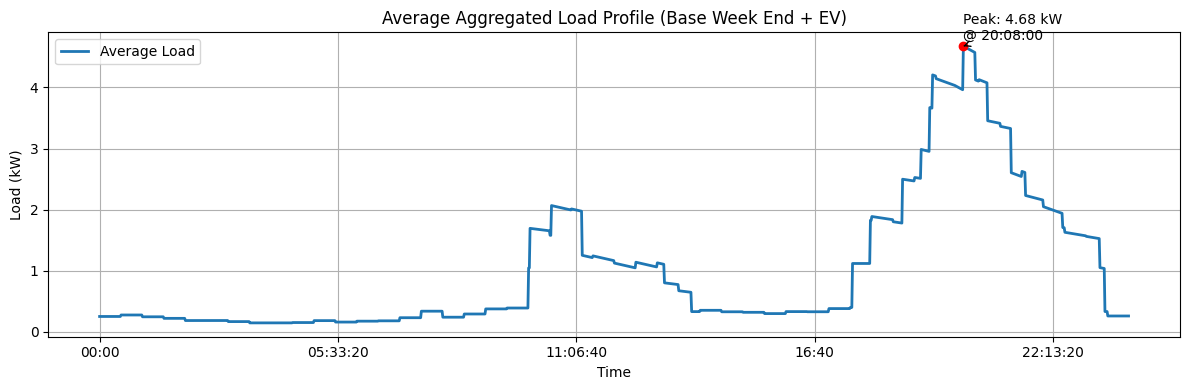

In [160]:
# Ensure 'time' is set as index
base_we_ev.set_index('time', inplace=True)

# Step 1: Compute average profile
base_we_ev_profile = base_we_ev.mean(axis=1)

# Step 2: Find peak value and time
peak_value_base_we_ev = base_we_ev_profile.max()
peak_time_base_we_ev = base_we_ev_profile.idxmax()

print(f"🔺 Peak load: {peak_value_base_we_ev:.3f} kW at {peak_time_base_we_ev}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_we_ev_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time_base_we_ev, peak_value_base_we_ev, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value_base_we_ev:.2f} kW\n@ {peak_time_base_we_ev}',
             xy=(peak_time_base_we_ev, peak_value_base_we_ev),
             xytext=(peak_time_base_we_ev, peak_value_base_we_ev + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week End + EV)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [161]:
base_we_ev.head()

,MAC000028+EV_1,MAC000028+EV_2,MAC000028+EV_3,MAC000028+EV_4,MAC000028+EV_5,MAC000028+EV_6,MAC000028+EV_7,MAC000028+EV_8,MAC000028+EV_9,MAC000028+EV_10,...,MAC005273+EV_1,MAC005273+EV_2,MAC005273+EV_3,MAC005273+EV_4,MAC005273+EV_5,MAC005273+EV_6,MAC005273+EV_7,MAC005273+EV_8,MAC005273+EV_9,MAC005273+EV_10
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354
00:01:00,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354
00:02:00,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354
00:03:00,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354
00:04:00,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354,0.354


In [162]:
base_we_ev.to_csv('Base_load_WE_EV_aggregated.csv')

## Week Day - Base and EV profiles

In [163]:
# Set 'time' as index for both dataframes to align them for addition
base_wd_df = base_wd_time #.set_index('time')
ev_wd_df = ev_wd_time.set_index('time')

# Ensure all values are numeric
base_wd_df = base_wd_df.apply(pd.to_numeric, errors='coerce')
ev_wd_df = ev_wd_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list = [
    base_wd_df[base_wd_col] + ev_wd_df[ev_col]
    for base_wd_col in base_wd_df.columns
    for ev_col in ev_wd_df.columns
]

# Assign names like MAC000028+EV_1
column_names = [
    f'{base_wd_col}+{ev_col}'
    for base_wd_col in base_wd_df.columns
    for ev_col in ev_wd_df.columns
]

# Combine into one result dataframe
base_wd_ev = pd.concat(result_list, axis=1)
base_wd_ev.columns = column_names

# Reset index
base_wd_ev = base_wd_ev.reset_index()

base_wd_ev.tail()


,time,MAC000055+EV_1,MAC000055+EV_2,MAC000055+EV_3,MAC000055+EV_4,MAC000055+EV_5,MAC000055+EV_6,MAC000055+EV_7,MAC000055+EV_8,MAC000055+EV_9,...,MAC005531+EV_1,MAC005531+EV_2,MAC005531+EV_3,MAC005531+EV_4,MAC005531+EV_5,MAC005531+EV_6,MAC005531+EV_7,MAC005531+EV_8,MAC005531+EV_9,MAC005531+EV_10
1435,23:55:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.911184,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.453184,0.122
1436,23:56:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.891961,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.433961,0.122
1437,23:57:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.872738,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.414738,0.122
1438,23:58:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.853515,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.395515,0.122
1439,23:59:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.834291,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.376291,0.122


🔺 Peak load: 6.426 kW at 19:00:00


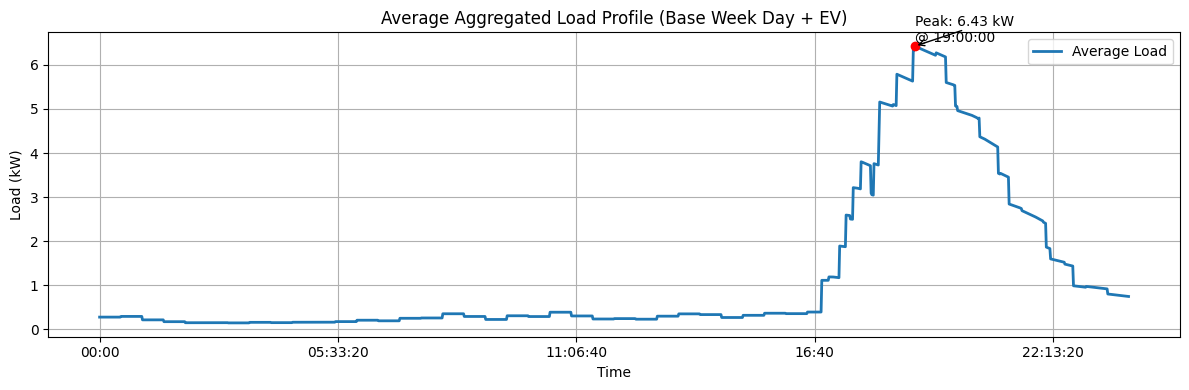

In [164]:
# Ensure 'time' is set as index
base_wd_ev.set_index('time', inplace=True)

# Step 1: Compute average profile
base_wd_ev_profile = base_wd_ev.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_wd_ev_profile.max()
peak_time = base_wd_ev_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_wd_ev_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week Day + EV)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [165]:
base_wd_ev.head()

,MAC000055+EV_1,MAC000055+EV_2,MAC000055+EV_3,MAC000055+EV_4,MAC000055+EV_5,MAC000055+EV_6,MAC000055+EV_7,MAC000055+EV_8,MAC000055+EV_9,MAC000055+EV_10,...,MAC005531+EV_1,MAC005531+EV_2,MAC005531+EV_3,MAC005531+EV_4,MAC005531+EV_5,MAC005531+EV_6,MAC005531+EV_7,MAC005531+EV_8,MAC005531+EV_9,MAC005531+EV_10
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,...,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238
00:01:00,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,...,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238
00:02:00,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,...,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238
00:03:00,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,...,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238
00:04:00,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,0.206,...,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238,0.238


In [166]:
base_wd_ev.to_csv('Base_load_WD_EV_aggregated.csv')

# Aggregating Base + HP

## Weekend -  Base and HP profiles

In [167]:
# Set 'time' as index for both dataframes to align them for addition
base_we_df = base_we_time #.set_index('time')
hp_df = hp_time.set_index('time')

# Ensure all values are numeric
base_we_df = base_we_df.apply(pd.to_numeric, errors='coerce')
hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list = [
    base_we_df[base_we_col] + hp_df[hp_col]
    for base_we_col in base_we_df.columns
    for hp_col in hp_df.columns
]

# Assign names like MAC000028+EV_1
column_names = [
    f'{base_we_col}+{hp_col}'
    for base_we_col in base_we_df.columns
    for hp_col in hp_df.columns
]

# Combine into one result dataframe
base_we_hp = pd.concat(result_list, axis=1)
base_we_hp.columns = column_names

# Reset index
base_we_hp = base_we_hp.reset_index()

base_we_hp.tail()


,time,MAC000028+AO_poor,MAC000028+NSB_poor,MAC000028+FTS_poor,MAC000028+AO_average,MAC000028+NSB_average,MAC000028+FTS_average,MAC000028+AO_good,MAC000028+NSB_good,MAC000028+FTS_good,...,MAC005270+FTS_good,MAC005273+AO_poor,MAC005273+NSB_poor,MAC005273+FTS_poor,MAC005273+AO_average,MAC005273+NSB_average,MAC005273+FTS_average,MAC005273+AO_good,MAC005273+NSB_good,MAC005273+FTS_good
1435,23:55:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1436,23:56:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1437,23:57:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1438,23:58:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1439,23:59:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176


🔺 Peak load: 3.558 kW at 07:59:00


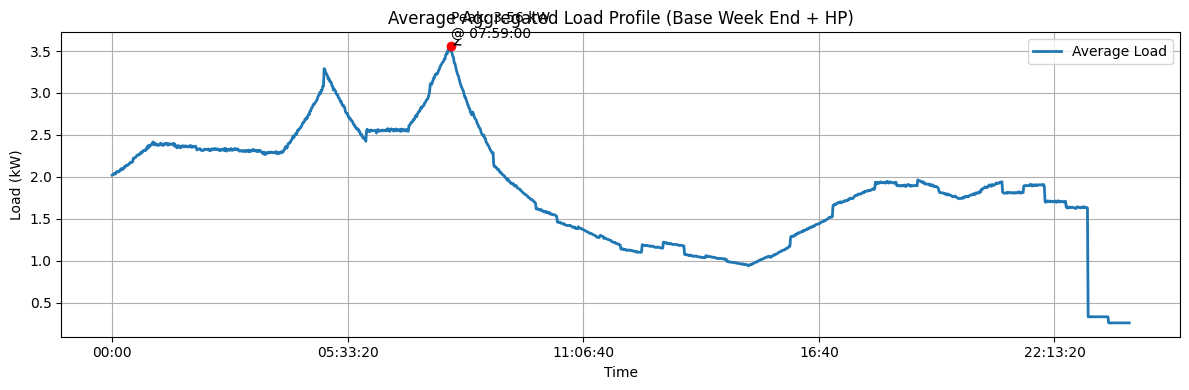

In [168]:
# Ensure 'time' is set as index
base_we_hp.set_index('time', inplace=True)

# Step 1: Compute average profile
base_we_hp_profile = base_we_hp.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_we_hp_profile.max()
peak_time = base_we_hp_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_we_hp_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week End + HP)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [172]:
base_we_hp.to_csv('Base_load_WE_HP_aggregated.csv')

## Aggregating Base Week Day and HP profiles

In [173]:
base_wd_time.head()

,MAC000055,MAC000203,MAC000214,MAC000239,MAC000250,MAC000676,MAC000727,MAC000734,MAC000761,MAC000792,...,MAC003718,MAC004146,MAC004508,MAC004619,MAC004848,MAC004856,MAC004933,MAC005219,MAC005325,MAC005531
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,0.216,0.77,0.452,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
00:01:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,0.216,0.77,0.452,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
00:02:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,0.216,0.77,0.452,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
00:03:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,0.216,0.77,0.452,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238
00:04:00,0.206,0.188,0.084,0.226,0.522,0.134,0.344,0.216,0.77,0.452,...,0.214,0.31,0.096,0.168,0.11,0.402,0.524,1.436,0.474,0.238


In [174]:
hp_time.head()

,time,AO_poor,NSB_poor,FTS_poor,AO_average,NSB_average,FTS_average,AO_good,NSB_good,FTS_good
0,00:00:00,2.917747,2.490727,2.532152,1.971624,1.666706,1.666743,1.008754,0.834506,0.845742
1,00:01:00,2.965239,2.483781,2.567984,1.964393,1.637305,1.691752,0.968303,0.828075,0.844643
2,00:02:00,2.991040,2.512638,2.513154,2.019406,1.679856,1.669540,0.997214,0.835413,0.849497
3,00:03:00,2.985950,2.507355,2.529811,1.973115,1.688227,1.688374,1.004388,0.835998,0.836774
4,00:04:00,2.994980,2.544776,2.537922,1.976368,1.695230,1.720389,0.982668,0.836971,0.832691


In [175]:
# Set 'time' as index for both dataframes to align them for addition
base_wd_df = base_wd_time #.set_index('time')
hp_df = hp_time.set_index('time')

# Ensure all values are numeric
base_wd_df = base_wd_df.apply(pd.to_numeric, errors='coerce')
hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list = [
    base_wd_df[base_wd_col] + hp_df[hp_col]
    for base_wd_col in base_wd_df.columns
    for hp_col in hp_df.columns
]

# Assign names like MAC000028+EV_1
column_names = [
    f'{base_wd_col}+{hp_col}'
    for base_wd_col in base_wd_df.columns
    for hp_col in hp_df.columns
]

# Combine into one result dataframe
base_wd_hp = pd.concat(result_list, axis=1)
base_wd_hp.columns = column_names

# Reset index
base_wd_hp = base_wd_hp.reset_index()

base_wd_hp.head()


,time,MAC000055+AO_poor,MAC000055+NSB_poor,MAC000055+FTS_poor,MAC000055+AO_average,MAC000055+NSB_average,MAC000055+FTS_average,MAC000055+AO_good,MAC000055+NSB_good,MAC000055+FTS_good,...,MAC005325+FTS_good,MAC005531+AO_poor,MAC005531+NSB_poor,MAC005531+FTS_poor,MAC005531+AO_average,MAC005531+NSB_average,MAC005531+FTS_average,MAC005531+AO_good,MAC005531+NSB_good,MAC005531+FTS_good
0,00:00:00,3.123747,2.696727,2.738152,2.177624,1.872706,1.872743,1.214754,1.040506,1.051742,...,1.319742,3.155747,2.728727,2.770152,2.209624,1.904706,1.904743,1.246754,1.072506,1.083742
1,00:01:00,3.171239,2.689781,2.773984,2.170393,1.843305,1.897752,1.174303,1.034075,1.050643,...,1.318643,3.203239,2.721781,2.805984,2.202393,1.875305,1.929752,1.206303,1.066075,1.082643
2,00:02:00,3.197040,2.718638,2.719154,2.225406,1.885856,1.875540,1.203214,1.041413,1.055497,...,1.323497,3.229040,2.750638,2.751154,2.257406,1.917856,1.907540,1.235214,1.073413,1.087497
3,00:03:00,3.191950,2.713355,2.735811,2.179115,1.894227,1.894374,1.210388,1.041998,1.042774,...,1.310774,3.223950,2.745355,2.767811,2.211115,1.926227,1.926374,1.242388,1.073998,1.074774
4,00:04:00,3.200980,2.750776,2.743922,2.182368,1.901230,1.926389,1.188668,1.042971,1.038691,...,1.306691,3.232980,2.782776,2.775922,2.214368,1.933230,1.958389,1.220668,1.074971,1.070691


🔺 Peak load: 3.609 kW at 08:00:00


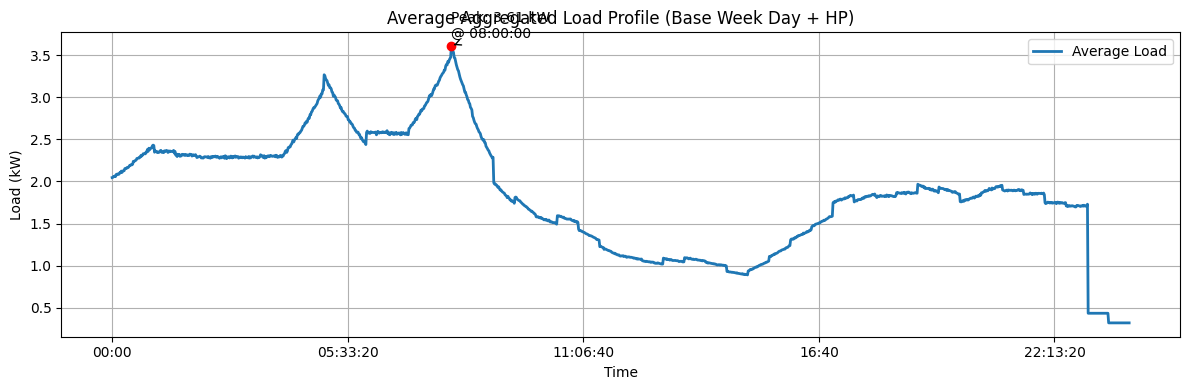

In [176]:
# Ensure 'time' is set as index
base_wd_hp.set_index('time', inplace=True)

# Step 1: Compute average profile
base_wd_hp_profile = base_wd_hp.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_wd_hp_profile.max()
peak_time = base_wd_hp_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_wd_hp_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week Day + HP)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [177]:
base_wd_hp.to_csv('Base_load_WD_HP_aggregated_new.csv')

# Aggregating Base + EV + HP

## Week End  - Base + EV + HP

In [178]:
# Set 'time' as index for both dataframes to align them for addition
# base_we_ev_df = base_ev.set_index('time')
# hp_df = hp_time.set_index('time')

# Ensure all values are numeric
base_we_ev_df = base_we_ev.apply(pd.to_numeric, errors='coerce')
hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list = [
    base_we_ev_df[base_we_ev_col] + hp_df[hp_col]
    for base_we_ev_col in base_we_ev_df.columns
    for hp_col in hp_df.columns
]

# Assign names like MAC000028+EV_1
column_names = [
    f'{base_we_ev_col}+{hp_col}'
    for base_we_ev_col in base_we_ev_df.columns
    for hp_col in hp_df.columns
]

# Combine into one result dataframe
base_we_ev_hp = pd.concat(result_list, axis=1)
base_we_ev_hp.columns = column_names

# Reset index
base_we_ev_hp = base_we_ev_hp.reset_index()

base_we_ev_hp.tail()


,time,MAC000028+EV_1+AO_poor,MAC000028+EV_1+NSB_poor,MAC000028+EV_1+FTS_poor,MAC000028+EV_1+AO_average,MAC000028+EV_1+NSB_average,MAC000028+EV_1+FTS_average,MAC000028+EV_1+AO_good,MAC000028+EV_1+NSB_good,MAC000028+EV_1+FTS_good,...,MAC005273+EV_9+FTS_good,MAC005273+EV_10+AO_poor,MAC005273+EV_10+NSB_poor,MAC005273+EV_10+FTS_poor,MAC005273+EV_10+AO_average,MAC005273+EV_10+NSB_average,MAC005273+EV_10+FTS_average,MAC005273+EV_10+AO_good,MAC005273+EV_10+NSB_good,MAC005273+EV_10+FTS_good
1435,23:55:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1436,23:56:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1437,23:57:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1438,23:58:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1439,23:59:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176


🔺 Peak load: 5.993 kW at 20:08:00


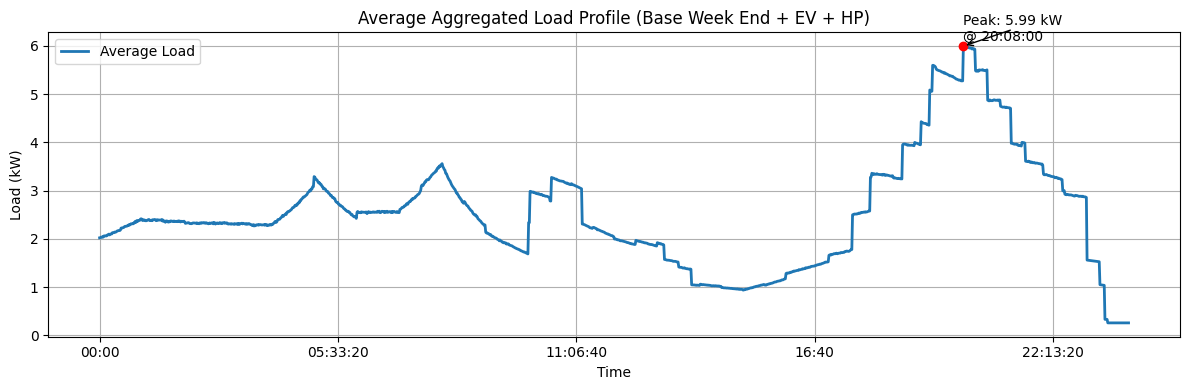

In [179]:
# Ensure 'time' is set as index
base_we_ev_hp.set_index('time', inplace=True)

# Step 1: Compute average profile
base_we_ev_hp_profile = base_we_ev_hp.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_we_ev_hp_profile.max()
peak_time = base_we_ev_hp_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_we_ev_hp_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week End + EV + HP)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [180]:
base_we_ev_hp.to_csv('Base_load_WE_EV_HP_aggregated.csv')

## Week Day Base + EV + HP

In [181]:
# Set 'time' as index for both dataframes to align them for addition
# base_wd_ev_df = base_we_ev.set_index('time')
# hp_df = hp_time.set_index('time')

# Ensure all values are numeric
base_wd_ev_df = base_wd_ev.apply(pd.to_numeric, errors='coerce')
hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list = [
    base_wd_ev_df[base_wd_ev_col] + hp_df[hp_col]
    for base_wd_ev_col in base_wd_ev_df.columns
    for hp_col in hp_df.columns
]

# Assign names like MAC000028+EV_1
column_names = [
    f'{base_wd_ev_col}+{hp_col}'
    for base_wd_ev_col in base_wd_ev_df.columns
    for hp_col in hp_df.columns
]

# Combine into one result dataframe
base_wd_ev_hp = pd.concat(result_list, axis=1)
base_wd_ev_hp.columns = column_names

# Reset index
base_wd_ev_hp = base_wd_ev_hp.reset_index()

base_wd_ev_hp.tail()


,time,MAC000055+EV_1+AO_poor,MAC000055+EV_1+NSB_poor,MAC000055+EV_1+FTS_poor,MAC000055+EV_1+AO_average,MAC000055+EV_1+NSB_average,MAC000055+EV_1+FTS_average,MAC000055+EV_1+AO_good,MAC000055+EV_1+NSB_good,MAC000055+EV_1+FTS_good,...,MAC005531+EV_9+FTS_good,MAC005531+EV_10+AO_poor,MAC005531+EV_10+NSB_poor,MAC005531+EV_10+FTS_poor,MAC005531+EV_10+AO_average,MAC005531+EV_10+NSB_average,MAC005531+EV_10+FTS_average,MAC005531+EV_10+AO_good,MAC005531+EV_10+NSB_good,MAC005531+EV_10+FTS_good
1435,23:55:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.453184,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1436,23:56:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.433961,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1437,23:57:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.414738,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1438,23:58:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.395515,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1439,23:59:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.376291,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122


🔺 Peak load: 7.898 kW at 19:00:00


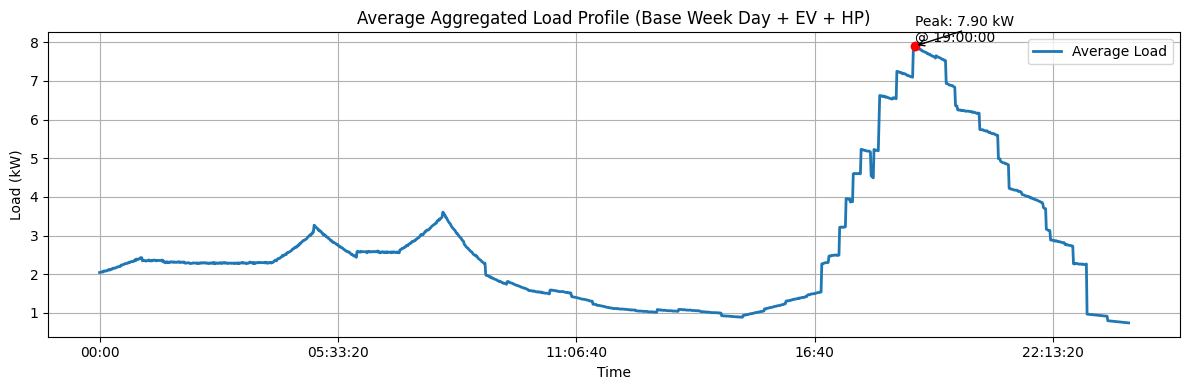

In [182]:
# Ensure 'time' is set as index
base_wd_ev_hp.set_index('time', inplace=True)

# Step 1: Compute average profile
base_wd_ev_hp_profile = base_wd_ev_hp.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_wd_ev_hp_profile.max()
peak_time = base_wd_ev_hp_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_wd_ev_hp_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week Day + EV + HP)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [183]:
base_wd_ev_hp.to_csv('Base_load_WD_EV_HP_aggregated.csv')

# Adding PV + battery load to all scenarios

## Week End Base + PV

In [184]:
# Set 'time' as index for both dataframes to align them for addition
# base_we_df = base_we_time.set_index('time')
pv_df = pv_time.set_index('time')

# Ensure all values are numeric
# base_we_df = base_we_df.apply(pd.to_numeric, errors='coerce')
# hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list_base_we_pv = [
    base_we_df[base_we_col] - pv_df[pv_col]
    for base_we_col in base_we_df.columns
    for pv_col in pv_df.columns
]


# Assign names like MAC000028+EV_1
column_names_base_we_pv = [
    f'{base_we_col}+{pv_col}'
    for base_we_col in base_we_df.columns
    for pv_col in pv_df.columns
]

# Combine into one result dataframe
base_we_pv = pd.concat(result_list_base_we_pv, axis=1)
base_we_pv.columns = column_names_base_we_pv

# Reset index
base_we_pv = base_we_pv.reset_index()

base_we_pv.tail()


,time,MAC000028+pv_output_kW,MAC000041+pv_output_kW,MAC000058+pv_output_kW,MAC000089+pv_output_kW,MAC000095+pv_output_kW,MAC000126+pv_output_kW,MAC000143+pv_output_kW,MAC000144+pv_output_kW,MAC000148+pv_output_kW,...,MAC005024+pv_output_kW,MAC005025+pv_output_kW,MAC005193+pv_output_kW,MAC005227+pv_output_kW,MAC005229+pv_output_kW,MAC005257+pv_output_kW,MAC005261+pv_output_kW,MAC005268+pv_output_kW,MAC005270+pv_output_kW,MAC005273+pv_output_kW
1435,23:55:00,0.148,0.224,0.03,0.1,0.556,0.182,0.172,0.234,0.278,...,0.432,0.162,0.25,0.262,0.502,0.206,0.342,0.124,0.276,0.176
1436,23:56:00,0.148,0.224,0.03,0.1,0.556,0.182,0.172,0.234,0.278,...,0.432,0.162,0.25,0.262,0.502,0.206,0.342,0.124,0.276,0.176
1437,23:57:00,0.148,0.224,0.03,0.1,0.556,0.182,0.172,0.234,0.278,...,0.432,0.162,0.25,0.262,0.502,0.206,0.342,0.124,0.276,0.176
1438,23:58:00,0.148,0.224,0.03,0.1,0.556,0.182,0.172,0.234,0.278,...,0.432,0.162,0.25,0.262,0.502,0.206,0.342,0.124,0.276,0.176
1439,23:59:00,0.148,0.224,0.03,0.1,0.556,0.182,0.172,0.234,0.278,...,0.432,0.162,0.25,0.262,0.502,0.206,0.342,0.124,0.276,0.176


🔺 Peak load: 0.518 kW at 21:30:00


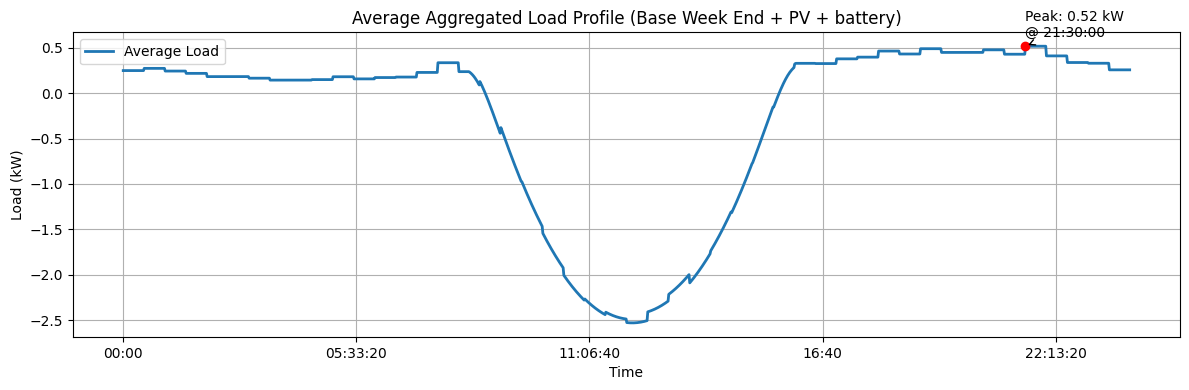

In [185]:
# Ensure 'time' is set as index
base_we_pv.set_index('time', inplace=True)

# Step 1: Compute average profile
base_we_pv_profile = base_we_pv.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_we_pv_profile.max()
peak_time = base_we_pv_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_we_pv_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week End + PV + battery)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [186]:
base_we_pv.to_csv('Base_load_WE_PV_aggregated.csv')

## Base Week Day load + PV

In [187]:
# Set 'time' as index for both dataframes to align them for addition
# base_wd_df = base_wd_time.set_index('time')
pv_df = pv_time.set_index('time')

# Ensure all values are numeric
# base_wd_df = base_wd_df.apply(pd.to_numeric, errors='coerce')
# hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list_base_wd_pv = [
    base_wd_df[base_wd_col] - pv_df[pv_col]
    for base_wd_col in base_wd_df.columns
    for pv_col in pv_df.columns
]


# Assign names like MAC000028+EV_1
column_names_base_wd_pv = [
    f'{base_wd_col}+{pv_col}'
    for base_wd_col in base_wd_df.columns
    for pv_col in pv_df.columns
]

# Combine into one result dataframe
base_wd_pv = pd.concat(result_list_base_wd_pv, axis=1)
base_wd_pv.columns = column_names_base_wd_pv

# Reset index
base_wd_pv = base_wd_pv.reset_index()

base_wd_pv.tail()


,time,MAC000055+pv_output_kW,MAC000203+pv_output_kW,MAC000214+pv_output_kW,MAC000239+pv_output_kW,MAC000250+pv_output_kW,MAC000676+pv_output_kW,MAC000727+pv_output_kW,MAC000734+pv_output_kW,MAC000761+pv_output_kW,...,MAC003718+pv_output_kW,MAC004146+pv_output_kW,MAC004508+pv_output_kW,MAC004619+pv_output_kW,MAC004848+pv_output_kW,MAC004856+pv_output_kW,MAC004933+pv_output_kW,MAC005219+pv_output_kW,MAC005325+pv_output_kW,MAC005531+pv_output_kW
1435,23:55:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
1436,23:56:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
1437,23:57:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
1438,23:58:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122
1439,23:59:00,0.58,0.204,0.328,0.324,0.536,0.112,0.36,0.366,0.666,...,0.482,0.278,0.098,0.584,0.086,0.34,0.514,0.154,0.426,0.122


🔺 Peak load: 0.558 kW at 19:30:00


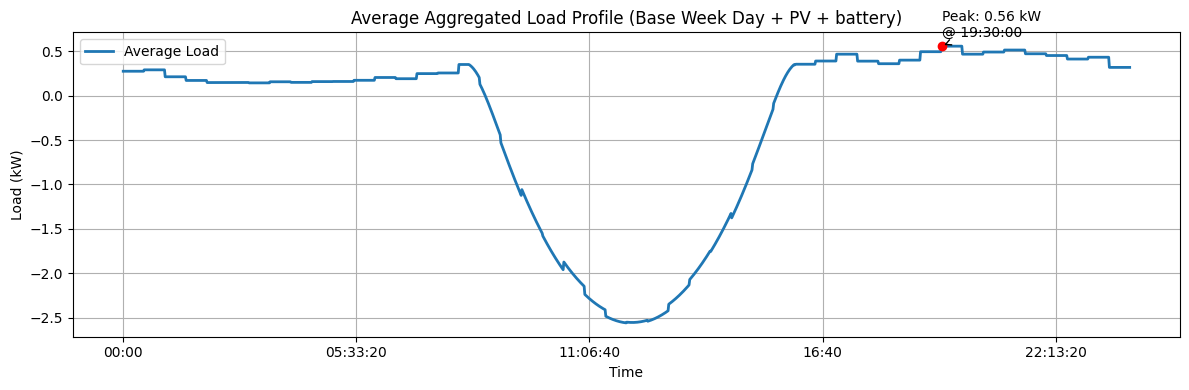

In [188]:
# Ensure 'time' is set as index
base_wd_pv.set_index('time', inplace=True)

# Step 1: Compute average profile
base_wd_pv_profile = base_wd_pv.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_wd_pv_profile.max()
peak_time = base_wd_pv_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_wd_pv_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week Day + PV + battery)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [189]:
base_wd_pv.to_csv('Base_load_WD_PV_aggregated.csv')

## Base Week End + EV + PV

In [190]:
# Set 'time' as index for both dataframes to align them for addition
# base_we_ev_df = base_we_ev.set_index('time')
# pv_df = pv_time.set_index('time')

# Ensure all values are numeric
# base_we_df = base_we_df.apply(pd.to_numeric, errors='coerce')
# hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list_base_we_ev_pv = [
    base_we_ev[base_we_ev_col] - pv_df[pv_col]
    for base_we_ev_col in base_we_ev.columns
    for pv_col in pv_df.columns
]


# Assign names like MAC000028+EV_1
column_names_base_we_ev_pv = [
    f'{base_we_ev_col}+{pv_col}'
    for base_we_ev_col in base_we_ev.columns
    for pv_col in pv_df.columns
]

# Combine into one result dataframe
base_we_ev_pv = pd.concat(result_list_base_we_ev_pv, axis=1)
base_we_ev_pv.columns = column_names_base_we_ev_pv

# Reset index
base_we_ev_pv = base_we_ev_pv.reset_index()

base_we_ev_pv.tail()


,time,MAC000028+EV_1+pv_output_kW,MAC000028+EV_2+pv_output_kW,MAC000028+EV_3+pv_output_kW,MAC000028+EV_4+pv_output_kW,MAC000028+EV_5+pv_output_kW,MAC000028+EV_6+pv_output_kW,MAC000028+EV_7+pv_output_kW,MAC000028+EV_8+pv_output_kW,MAC000028+EV_9+pv_output_kW,...,MAC005273+EV_1+pv_output_kW,MAC005273+EV_2+pv_output_kW,MAC005273+EV_3+pv_output_kW,MAC005273+EV_4+pv_output_kW,MAC005273+EV_5+pv_output_kW,MAC005273+EV_6+pv_output_kW,MAC005273+EV_7+pv_output_kW,MAC005273+EV_8+pv_output_kW,MAC005273+EV_9+pv_output_kW,MAC005273+EV_10+pv_output_kW
1435,23:55:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1436,23:56:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1437,23:57:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1438,23:58:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1439,23:59:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176


🔺 Peak load: 4.677 kW at 20:08:00


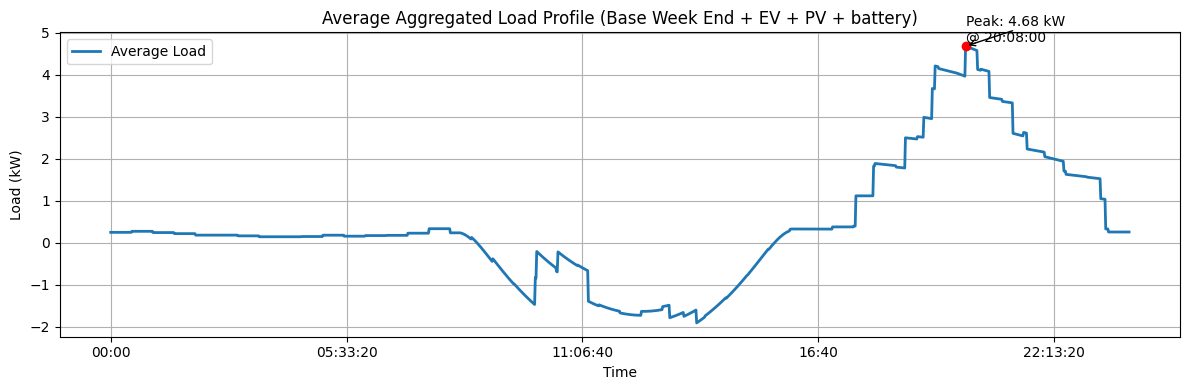

In [191]:
# Ensure 'time' is set as index
base_we_ev_pv.set_index('time', inplace=True)

# Step 1: Compute average profile
base_we_ev_pv_profile = base_we_ev_pv.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_we_ev_pv_profile.max()
peak_time = base_we_ev_pv_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_we_ev_pv_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week End + EV + PV + battery)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [192]:
base_we_ev_pv.to_csv('Base_load_WE_EV_PV_aggregated.csv')

## Base Week Day + EV + PV

In [193]:
# Set 'time' as index for both dataframes to align them for addition
# base_we_ev_df = base_we_ev.set_index('time')
# pv_df = pv_time.set_index('time')

# Ensure all values are numeric
# base_we_df = base_we_df.apply(pd.to_numeric, errors='coerce')
# hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list_base_wd_ev_pv = [
    base_wd_ev[base_wd_ev_col] - pv_df[pv_col]
    for base_wd_ev_col in base_wd_ev.columns
    for pv_col in pv_df.columns
]


# Assign names like MAC000028+EV_1
column_names_base_wd_ev_pv = [
    f'{base_wd_ev_col}+{pv_col}'
    for base_wd_ev_col in base_wd_ev.columns
    for pv_col in pv_df.columns
]

# Combine into one result dataframe
base_wd_ev_pv = pd.concat(result_list_base_wd_ev_pv, axis=1)
base_wd_ev_pv.columns = column_names_base_wd_ev_pv

# Reset index
base_wd_ev_pv = base_wd_ev_pv.reset_index()

base_wd_ev_pv.tail()


,time,MAC000055+EV_1+pv_output_kW,MAC000055+EV_2+pv_output_kW,MAC000055+EV_3+pv_output_kW,MAC000055+EV_4+pv_output_kW,MAC000055+EV_5+pv_output_kW,MAC000055+EV_6+pv_output_kW,MAC000055+EV_7+pv_output_kW,MAC000055+EV_8+pv_output_kW,MAC000055+EV_9+pv_output_kW,...,MAC005531+EV_1+pv_output_kW,MAC005531+EV_2+pv_output_kW,MAC005531+EV_3+pv_output_kW,MAC005531+EV_4+pv_output_kW,MAC005531+EV_5+pv_output_kW,MAC005531+EV_6+pv_output_kW,MAC005531+EV_7+pv_output_kW,MAC005531+EV_8+pv_output_kW,MAC005531+EV_9+pv_output_kW,MAC005531+EV_10+pv_output_kW
1435,23:55:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.911184,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.453184,0.122
1436,23:56:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.891961,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.433961,0.122
1437,23:57:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.872738,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.414738,0.122
1438,23:58:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.853515,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.395515,0.122
1439,23:59:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,4.834291,...,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,4.376291,0.122


🔺 Peak load: 6.426 kW at 19:00:00


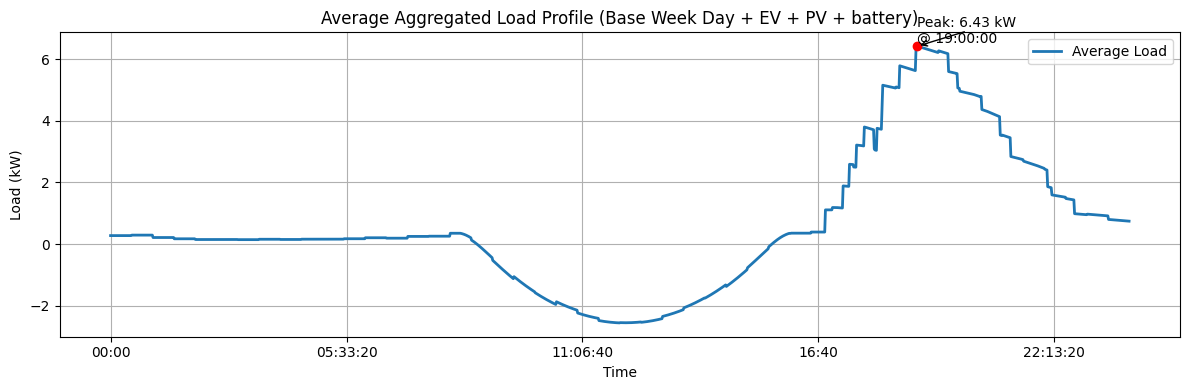

In [194]:
# Ensure 'time' is set as index
base_wd_ev_pv.set_index('time', inplace=True)

# Step 1: Compute average profile
base_wd_ev_pv_profile = base_wd_ev_pv.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_wd_ev_pv_profile.max()
peak_time = base_wd_ev_pv_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_wd_ev_pv_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week Day + EV + PV + battery)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [195]:
base_wd_ev_pv.to_csv('Base_load_WD_EV_PV_aggregated.csv')

# Base Week End + EV + HP + PV

In [196]:
# Set 'time' as index for both dataframes to align them for addition
# base_we_ev_df = base_we_ev.set_index('time')
# pv_df = pv_time.set_index('time')

# Ensure all values are numeric
# base_we_df = base_we_df.apply(pd.to_numeric, errors='coerce')
# hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list_base_we_ev_hp_pv = [
    base_we_ev_hp[base_we_ev_hp_col] - pv_df[pv_col]
    for base_we_ev_hp_col in base_we_ev_hp.columns
    for pv_col in pv_df.columns
]


# Assign names like MAC000028+EV_1
column_names_base_we_ev_hp_pv = [
    f'{base_we_ev_hp_col}+{pv_col}'
    for base_we_ev_hp_col in base_we_ev_hp.columns
    for pv_col in pv_df.columns
]

# Combine into one result dataframe
base_we_ev_hp_pv = pd.concat(result_list_base_we_ev_hp_pv, axis=1)
base_we_ev_hp_pv.columns = column_names_base_we_ev_hp_pv

# Reset index
base_we_ev_hp_pv = base_we_ev_hp_pv.reset_index()

base_we_ev_hp_pv.tail()


,time,MAC000028+EV_1+AO_poor+pv_output_kW,MAC000028+EV_1+NSB_poor+pv_output_kW,MAC000028+EV_1+FTS_poor+pv_output_kW,MAC000028+EV_1+AO_average+pv_output_kW,MAC000028+EV_1+NSB_average+pv_output_kW,MAC000028+EV_1+FTS_average+pv_output_kW,MAC000028+EV_1+AO_good+pv_output_kW,MAC000028+EV_1+NSB_good+pv_output_kW,MAC000028+EV_1+FTS_good+pv_output_kW,...,MAC005273+EV_9+FTS_good+pv_output_kW,MAC005273+EV_10+AO_poor+pv_output_kW,MAC005273+EV_10+NSB_poor+pv_output_kW,MAC005273+EV_10+FTS_poor+pv_output_kW,MAC005273+EV_10+AO_average+pv_output_kW,MAC005273+EV_10+NSB_average+pv_output_kW,MAC005273+EV_10+FTS_average+pv_output_kW,MAC005273+EV_10+AO_good+pv_output_kW,MAC005273+EV_10+NSB_good+pv_output_kW,MAC005273+EV_10+FTS_good+pv_output_kW
1435,23:55:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1436,23:56:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1437,23:57:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1438,23:58:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1439,23:59:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176


🔺 Peak load: 4.677 kW at 20:08:00


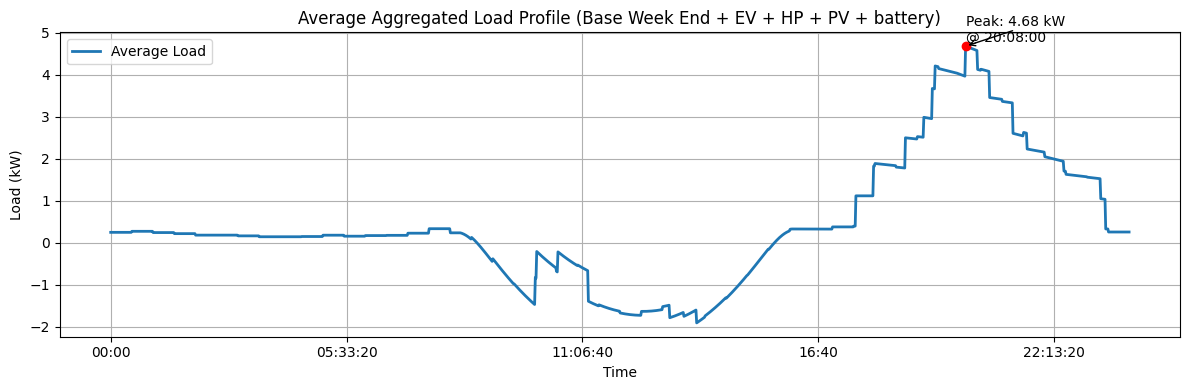

In [197]:
# Ensure 'time' is set as index
base_we_ev_hp_pv.set_index('time', inplace=True)

# Step 1: Compute average profile
base_we_ev_hp_pv_profile = base_we_ev_pv.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_we_ev_hp_pv_profile.max()
peak_time = base_we_ev_hp_pv_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_we_ev_hp_pv_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week End + EV + HP + PV + battery)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [198]:
base_we_ev_hp_pv.to_csv('Base_load_WE_EV_HP_PV_aggregated.csv')

# Base Week Day + EV + HP + PV

In [199]:
# Set 'time' as index for both dataframes to align them for addition
# base_wd_ev_df = base_wd_ev.set_index('time')
# pv_df = pv_time.set_index('time')

# Ensure all values are numeric
# base_wd_df = base_wd_df.apply(pd.to_numeric, errors='coerce')
# hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list_base_wd_ev_hp_pv = [
    base_wd_ev_hp[base_wd_ev_hp_col] - pv_df[pv_col]
    for base_wd_ev_hp_col in base_wd_ev_hp.columns
    for pv_col in pv_df.columns
]


# Assign names like MAC000028+EV_1
column_names_base_wd_ev_hp_pv = [
    f'{base_wd_ev_hp_col}+{pv_col}'
    for base_wd_ev_hp_col in base_wd_ev_hp.columns
    for pv_col in pv_df.columns
]

# Combine into one result dataframe
base_wd_ev_hp_pv = pd.concat(result_list_base_wd_ev_hp_pv, axis=1)
base_wd_ev_hp_pv.columns = column_names_base_wd_ev_hp_pv

# Reset index
base_wd_ev_hp_pv = base_wd_ev_hp_pv.reset_index()

base_wd_ev_hp_pv.tail()


,time,MAC000055+EV_1+AO_poor+pv_output_kW,MAC000055+EV_1+NSB_poor+pv_output_kW,MAC000055+EV_1+FTS_poor+pv_output_kW,MAC000055+EV_1+AO_average+pv_output_kW,MAC000055+EV_1+NSB_average+pv_output_kW,MAC000055+EV_1+FTS_average+pv_output_kW,MAC000055+EV_1+AO_good+pv_output_kW,MAC000055+EV_1+NSB_good+pv_output_kW,MAC000055+EV_1+FTS_good+pv_output_kW,...,MAC005531+EV_9+FTS_good+pv_output_kW,MAC005531+EV_10+AO_poor+pv_output_kW,MAC005531+EV_10+NSB_poor+pv_output_kW,MAC005531+EV_10+FTS_poor+pv_output_kW,MAC005531+EV_10+AO_average+pv_output_kW,MAC005531+EV_10+NSB_average+pv_output_kW,MAC005531+EV_10+FTS_average+pv_output_kW,MAC005531+EV_10+AO_good+pv_output_kW,MAC005531+EV_10+NSB_good+pv_output_kW,MAC005531+EV_10+FTS_good+pv_output_kW
1435,23:55:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.453184,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1436,23:56:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.433961,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1437,23:57:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.414738,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1438,23:58:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.395515,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1439,23:59:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,4.376291,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122


🔺 Peak load: 6.426 kW at 19:00:00


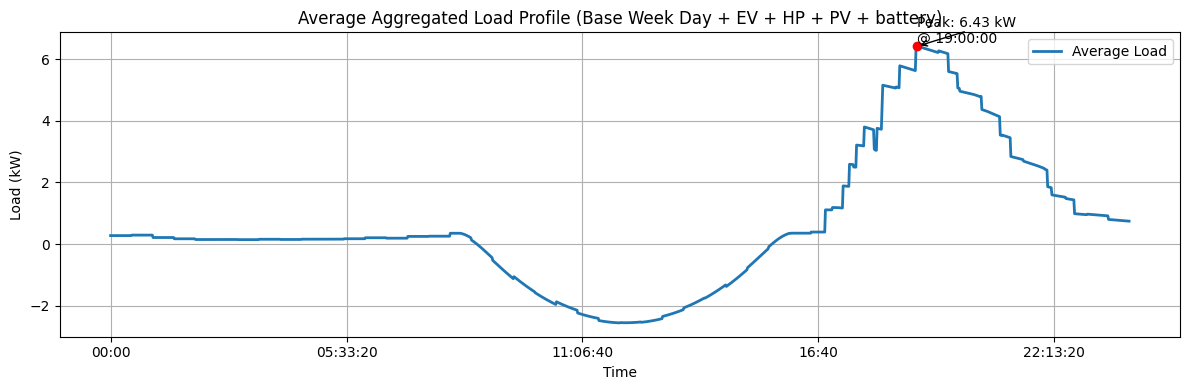

In [200]:
# Ensure 'time' is set as index
base_wd_ev_hp_pv.set_index('time', inplace=True)

# Step 1: Compute average profile
base_wd_ev_hp_pv_profile = base_wd_ev_pv.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_wd_ev_hp_pv_profile.max()
peak_time = base_wd_ev_hp_pv_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_wd_ev_hp_pv_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week Day + EV + HP + PV + battery)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [201]:
base_wd_ev_hp_pv.to_csv('Base_load_WD_EV_HP_PV_aggregated.csv')

# Base Week End + HP + PV

In [202]:
# Set 'time' as index for both dataframes to align them for addition
# base_we_hp_df = base_we_hp.set_index('time')
# pv_df = pv_time.set_index('time')

# Ensure all values are numeric
# base_we_df = base_we_df.apply(pd.to_numeric, errors='coerce')
# hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list_base_we_hp_pv = [
    base_we_hp[base_we_hp_col] - pv_df[pv_col]
    for base_we_hp_col in base_we_hp.columns
    for pv_col in pv_df.columns
]


# Assign names like MAC000028+EV_1
column_names_base_we_hp_pv = [
    f'{base_we_hp_col}+{pv_col}'
    for base_we_hp_col in base_we_hp.columns
    for pv_col in pv_df.columns
]

# Combine into one result dataframe
base_we_hp_pv = pd.concat(result_list_base_we_hp_pv, axis=1)
base_we_hp_pv.columns = column_names_base_we_hp_pv

# Reset index
base_we_hp_pv = base_we_hp_pv.reset_index()

base_we_hp_pv.tail()


,time,MAC000028+AO_poor+pv_output_kW,MAC000028+NSB_poor+pv_output_kW,MAC000028+FTS_poor+pv_output_kW,MAC000028+AO_average+pv_output_kW,MAC000028+NSB_average+pv_output_kW,MAC000028+FTS_average+pv_output_kW,MAC000028+AO_good+pv_output_kW,MAC000028+NSB_good+pv_output_kW,MAC000028+FTS_good+pv_output_kW,...,MAC005270+FTS_good+pv_output_kW,MAC005273+AO_poor+pv_output_kW,MAC005273+NSB_poor+pv_output_kW,MAC005273+FTS_poor+pv_output_kW,MAC005273+AO_average+pv_output_kW,MAC005273+NSB_average+pv_output_kW,MAC005273+FTS_average+pv_output_kW,MAC005273+AO_good+pv_output_kW,MAC005273+NSB_good+pv_output_kW,MAC005273+FTS_good+pv_output_kW
1435,23:55:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1436,23:56:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1437,23:57:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1438,23:58:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176
1439,23:59:00,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.276,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176,0.176


🔺 Peak load: 3.558 kW at 07:59:00


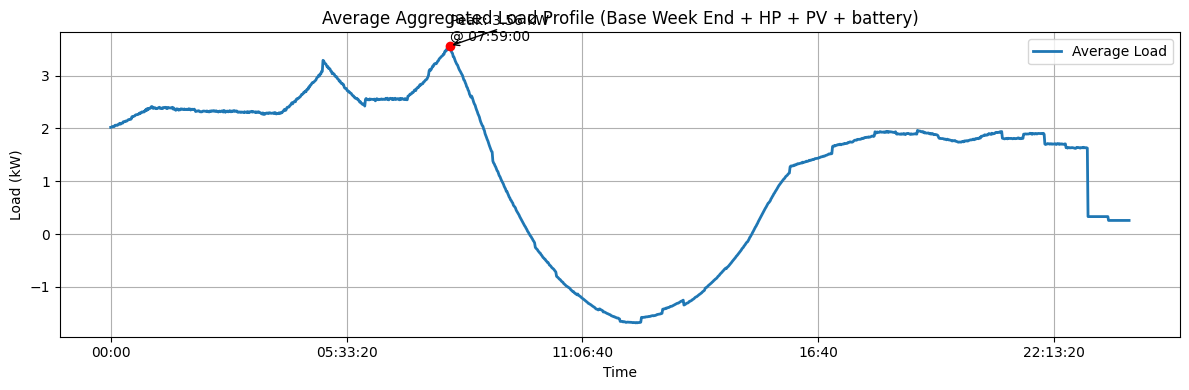

In [203]:
# Ensure 'time' is set as index
base_we_hp_pv.set_index('time', inplace=True)

# Step 1: Compute average profile
base_we_hp_pv_profile = base_we_hp_pv.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_we_hp_pv_profile.max()
peak_time = base_we_hp_pv_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_we_hp_pv_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week End + HP + PV + battery)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [204]:
base_we_hp_pv.to_csv('Base_load_WE_HP_PV_aggregated.csv')

# Base Week Day + HP + PV

In [205]:
# Set 'time' as index for both dataframes to align them for addition
# base_wd_hp_df = base_wd_hp.set_index('time')
# pv_df = pv_time.set_index('time')

# Ensure all values are numeric
# base_wd_df = base_wd_df.apply(pd.to_numeric, errors='coerce')
# hp_df = hp_df.apply(pd.to_numeric, errors='coerce')

# Create list of all combinations
result_list_base_wd_hp_pv = [
    base_wd_hp[base_wd_hp_col] - pv_df[pv_col]
    for base_wd_hp_col in base_wd_hp.columns
    for pv_col in pv_df.columns
]


# Assign names like MAC000028+EV_1
column_names_base_wd_hp_pv = [
    f'{base_wd_hp_col}+{pv_col}'
    for base_wd_hp_col in base_wd_hp.columns
    for pv_col in pv_df.columns
]

# Combine into one result dataframe
base_wd_hp_pv = pd.concat(result_list_base_wd_hp_pv, axis=1)
base_wd_hp_pv.columns = column_names_base_wd_hp_pv

# Reset index
base_wd_hp_pv = base_wd_hp_pv.reset_index()

base_wd_hp_pv.tail()


,time,MAC000055+AO_poor+pv_output_kW,MAC000055+NSB_poor+pv_output_kW,MAC000055+FTS_poor+pv_output_kW,MAC000055+AO_average+pv_output_kW,MAC000055+NSB_average+pv_output_kW,MAC000055+FTS_average+pv_output_kW,MAC000055+AO_good+pv_output_kW,MAC000055+NSB_good+pv_output_kW,MAC000055+FTS_good+pv_output_kW,...,MAC005325+FTS_good+pv_output_kW,MAC005531+AO_poor+pv_output_kW,MAC005531+NSB_poor+pv_output_kW,MAC005531+FTS_poor+pv_output_kW,MAC005531+AO_average+pv_output_kW,MAC005531+NSB_average+pv_output_kW,MAC005531+FTS_average+pv_output_kW,MAC005531+AO_good+pv_output_kW,MAC005531+NSB_good+pv_output_kW,MAC005531+FTS_good+pv_output_kW
1435,23:55:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,0.426,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1436,23:56:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,0.426,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1437,23:57:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,0.426,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1438,23:58:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,0.426,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122
1439,23:59:00,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,...,0.426,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.122


🔺 Peak load: 3.609 kW at 08:00:00


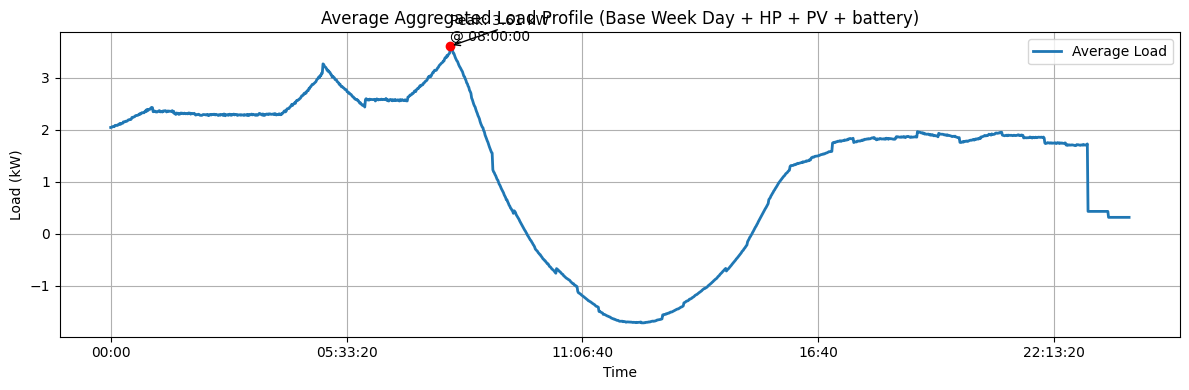

In [206]:
# Ensure 'time' is set as index
base_wd_hp_pv.set_index('time', inplace=True)

# Step 1: Compute average profile
base_wd_hp_pv_profile = base_wd_hp_pv.mean(axis=1)

# Step 2: Find peak value and time
peak_value = base_wd_hp_pv_profile.max()
peak_time = base_wd_hp_pv_profile.idxmax()

print(f"🔺 Peak load: {peak_value:.3f} kW at {peak_time}")

# Step 3: Plot with annotation
plt.figure(figsize=(12, 4))
base_wd_hp_pv_profile.plot(label='Average Load', linewidth=2)

# Add marker and annotation at the peak
plt.plot(peak_time, peak_value, 'ro')  # red dot
plt.annotate(f'Peak: {peak_value:.2f} kW\n@ {peak_time}',
             xy=(peak_time, peak_value),
             xytext=(peak_time, peak_value + 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.title("Average Aggregated Load Profile (Base Week Day + HP + PV + battery)")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [207]:
base_wd_hp_pv.to_csv('Base_load_WD_HP_PV_aggregated.csv')